**What is Parkinson’s Disease?**

Parkinson’s disease is a progressive disorder of the central nervous system affecting movement and inducing tremors and stiffness. It has 5 stages to it and affects more than 1 million individuals every year in India. This is chronic and has no cure yet. It is a neurodegenerative disorder affecting dopamine-producing neurons in the brain. Dataset is found here: https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/

There are two datasets within this. The first is in the root folder (`parkinsons.data` which is included here too) and can be used to detect Parkinsons. The second is within the `telemonitoring/` directory and contains UDPR scores for us to predict.

**What is XGBoost?**

XGBoost is a new Machine Learning algorithm designed with speed and performance in mind. XGBoost stands for eXtreme Gradient Boosting and is based on decision trees. In this project, we will import the XGBClassifier from the xgboost library; this is an implementation of the scikit-learn API for XGBoost classification.

**Detecting Parkinson’s Disease with XGBoost – Objective**

To build a model to accurately detect the presence of Parkinson’s disease in an individual.

We will build a model using an XGBClassifier. We’ll load the data, get the features and labels, scale the features, then split the dataset, build an XGBClassifier, and then calculate the accuracy of our model.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Get the features and labels from the DataFrame (dataset). The features are all the columns except ‘status’, and the labels are those in the ‘status’ column.

In [3]:
features=df.loc[:,df.columns!='status'].values[:,1:]
labels=df.loc[:,'status'].values

The ‘status’ column has values 0 and 1 as labels; let’s get the counts of these labels for both- 0 and 1.

In [5]:
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


We have 147 ones and 48 zeros in the status column in our dataset. We have about triple the number of observations for one label as the other, and not many total datapoints

Initialize a MinMaxScaler and scale the features to between -1 and 1 to normalize them. The MinMaxScaler transforms features by scaling them to a given range. The fit_transform() method fits to the data and then transforms it. We don’t need to scale the labels.

In [4]:
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

Now, split the dataset into training and testing sets keeping 20% of the data for testing.

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

Initialize an XGBClassifier and train the model. This classifies using eXtreme Gradient Boosting- using gradient boosting algorithms for modern data science problems. It falls under the category of Ensemble Learning in ML, where we train and predict using many models to produce one superior output.

In [6]:
model=XGBClassifier()
model.fit(x_train,y_train)

[15:55:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/anjalichauhan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Finally, generate y_pred (predicted values for x_test) and calculate the accuracy for the model. Print it out.

In [10]:
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100) # Test set accuracy

94.87179487179486


In [11]:
y_hat = [round(yhat) for yhat in model.predict(x)]
print(accuracy_score(y, y_hat)) # Full set accuracy

0.9897435897435898


Without any tuning we were able to get $94.85\%$ accuracy.

This is already amazing since the original paper from 2007 cites classification accuracy of $91.8 \pm 2.0\%$, and other papers from 2016 cite accuracies of $96.4\%$ (SVM) and $97\%$ with tuning (Boosted LogReg); with some tuning our model could far exceed state-of-the-art methods!

Parkinsons detection is likely best done with an XGBoost since outputs are 0 or 1 and it seems mostly linear.

The UDPR is very hard to fine tune with XGBoost. With an NN in Keras, we can fit much better. There are still some very bad apples in our data/predictions but the performance is overall/on average much better.

In [13]:
udpr_df = pd.read_csv('parkinsons_updrs.data')
udpr_df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


This data has multioutput so we'll have to dress out features and labels accordingly.

We're trying to predict motor and total UPDRS

In [14]:
features = udpr_df.loc[:, (udpr_df.columns != 'motor_UPDRS') & (udpr_df.columns != 'total_UPDRS')].values[:, 1:]
labels = udpr_df.loc[:, (udpr_df.columns == 'motor_UPDRS') | (udpr_df.columns == 'total_UPDRS')].values

We scale both the features and labels since the labels are continuous this time

In [16]:
X = scaler.fit_transform(features)
Y = scaler.fit_transform(labels)

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=7)

This data may be better suited to a NN so let's use Keras this time.

In [18]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

We can make a simple Sequential model. We'll use tanh as our activation, sgd as the optimizer, and mse as our loss since this is a continuous problem. We can also afford to validate with $25\%$ of our data. Set batch size to 1 because we can handle it!

In [19]:
u_model = Sequential()
u_model.add(Dense(32, input_shape=(X.shape[1],)))
u_model.add(Dense(16, activation='tanh'))
u_model.add(Dense(8, activation='tanh'))
u_model.add(Dense(72, activation='tanh'))
u_model.add(Dense(Y.shape[1], activation='tanh'))
u_model.compile(optimizer='sgd', loss='mean_squared_error')
u_model.fit(X_train, Y_train, batch_size=1, epochs=5, validation_split=0.25, shuffle=True)

Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2122 - val_loss: 0.1851
Epoch 2/5
3965/3965 [==============================] - 4s 974us/step - loss: 0.1878 - val_loss: 0.1742
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1737 - val_loss: 0.1679
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1633 - val_loss: 0.1497
Epoch 5/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1505 - val_loss: 0.1463


We can see it's training just fine. Let's train to 20 total epochs (15 more) and see if it levels off.

In [20]:
u_model.fit(X_train, Y_train, batch_size=1, epochs=15, validation_split=0.25, shuffle=True)

Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1424 - val_loss: 0.1320
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1366 - val_loss: 0.1268
Epoch 3/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1318 - val_loss: 0.1310
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1264 - val_loss: 0.1295
Epoch 5/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1207 - val_loss: 0.1190
Epoch 6/15
3965/3965 [==============================] - 6s 2ms/step - loss: 0.1185 - val_loss: 0.1125
Epoch 7/15
3965/3965 [==============================] - 6s 2ms/step - loss: 0.1151 - val_loss: 0.1183
Epoch 8/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1131 - val_loss: 0.1269
Epoch 9/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1120 - val_loss: 0.1079
Epoch 10/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.108

Seems like it's still got a bit to go before the minima--I tested it and found that it levels off around 100 total epochs (75 more).

In [21]:
u_model.fit(X_train, Y_train, batch_size=1, epochs=75, validation_split=0.25, shuffle=True)

Epoch 1/75
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1002 - val_loss: 0.1013s - los
Epoch 2/75
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0983 - val_loss: 0.1068
Epoch 3/75
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0982 - val_loss: 0.0951
Epoch 4/75
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0967 - val_loss: 0.0951
Epoch 5/75
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0958 - val_loss: 0.0926
Epoch 6/75
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0957 - val_loss: 0.0885
Epoch 7/75
3965/3965 [==============================] - 6s 2ms/step - loss: 0.0940 - val_loss: 0.1100
Epoch 8/75
3965/3965 [==============================] - 6s 2ms/step - loss: 0.0930 - val_loss: 0.0868
Epoch 9/75
3965/3965 [==============================] - 6s 2ms/step - loss: 0.0920 - val_loss: 0.1209
Epoch 10/75
3965/3965 [==============================] - 5s 1ms/step - loss

Keep fitting at 5 epochs until you see loss and val_loss level out and stop decreasing.

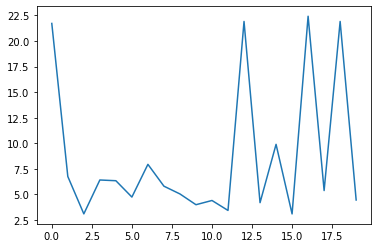

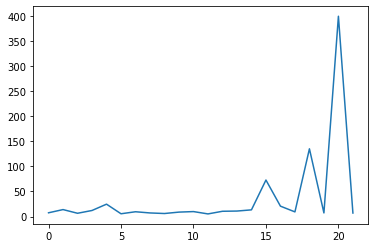

In [25]:
Y_hat = u_model.predict(X_test)
error = np.abs((Y_hat - Y_test) / Y_test)
plt.show(plt.plot(error[:, 0][error[:, 0] > 3]))
plt.show(plt.plot(error[:, 1][error[:, 1] > 5]))

There seem to be some certain samples that have high error rates. The overall loss is, however, low.

In [26]:
from xgboost import Booster

model._Booster.save_model('model.bin')

def load_xgb_model():
    _m = XGBClassifier()
    _b = Booster()
    _b.load_model('model.bin')
    _m._Booster = _b
    return _m

model = load_xgb_model()

In [27]:
from keras.models import load_model

u_model.save('u_model.hd5')
u_model = load_model('u_model.hd5')

INFO:tensorflow:Assets written to: u_model.hd5/assets
